# Lambert conformal map for North-America

High-latitude areas should rather be plotted on an area conserving projection. In the few lines of code below you find some examples to get you started.  

First, the imports. They are the same as always, but I removed the figure size defaults:

In [1]:
# Define the tools we are going to need today
%matplotlib inline
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xray  # NetCDF library
import cartopy  # Plotting libary
import cartopy.crs as ccrs  # Projections
# Some defaults
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen
# The commands below are not important
import warnings
warnings.filterwarnings('ignore')

### Read and select the regional data

Reading the data works as allways:

In [2]:
netcdf_orig = xray.open_dataset('./data/ERA-Int-Invariant.nc')

To select the data for a specific region, we will use xray's ``sel`` function as we learned it in the exercises. I've made a pre-selection for you but you are free to make the domain bigger/smaller if you find it useful for your analyses! Just **uncomment the two lines relevant for your case**:

In [3]:
# North-America -- note that I have to make the domain much larger in order to "fill" the plot below
netcdf = netcdf_orig.sel(latitude=slice(80, 10), longitude=slice(-180, 0))
plt.rcParams['figure.figsize'] = (14, 8)

Note that I set the standard figure size for each region. You can allways change those, and also make plots of any size later on (examples below).

Now we read the variable:

In [4]:
z = netcdf.z / 9.81

### Define the projection

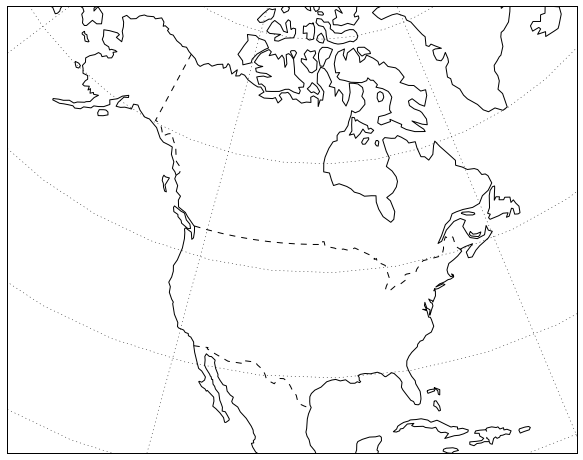

In [5]:
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-140, -60, 15, 75], ccrs.Geodetic())
ax.coastlines();
ax.gridlines();
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

### Make a plot

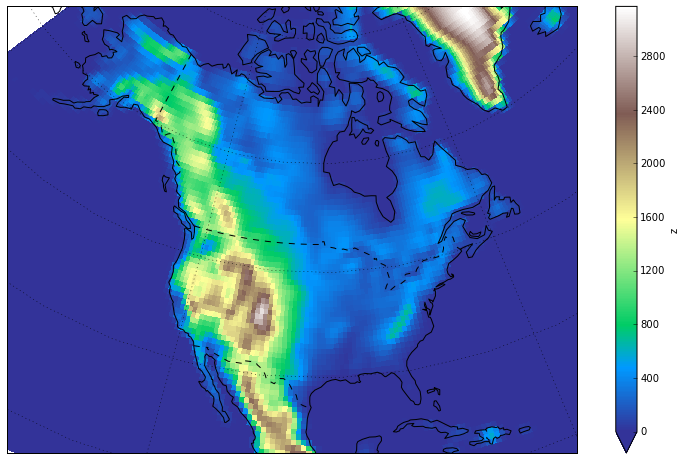

In [6]:
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-140, -60, 15, 75], ccrs.Geodetic())
ax.coastlines();
ax.gridlines();
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
z.plot(ax=ax, origin='upper', aspect='equal', transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');

**OK, you should be good now!**

### Tired of writing so many lines?

Note that it is possible to simplify your plotting commands by writing a **function**. We did not cover this during the course but it is quite easy. Let's write the following function:

In [7]:
def prepare_plot():
    """This function returns prepared axes for the regional plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig = plt.figure()
    ax = plt.axes(projection=ccrs.LambertConformal())
    ax.set_extent([-140, -60, 15, 75], ccrs.Geodetic())
    ax.coastlines();
    ax.gridlines();
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    return fig, ax

Now, making a plot has become even easier:

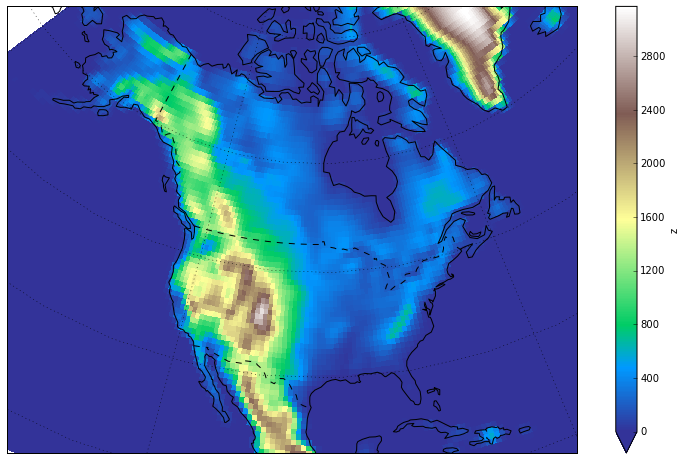

In [8]:
fig, ax = prepare_plot()
z.plot(ax=ax, origin='upper', aspect='equal', transform=ccrs.PlateCarree(), vmin=0, cmap='terrain');